<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 숫자 이미지 데이터 분류 모델 개선하기


### 데이터 확인

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data(path='minst.npz')


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

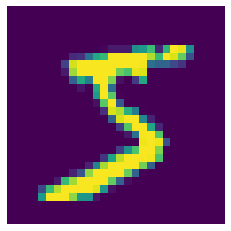

In [5]:
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

### 전처리

In [6]:
#스케일링
X_train = X_train/255.0
X_test - X_test/255.0


# y_train= tf.keras.utils.to_categorical(y_train, num_classes= 10)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes =10)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [7]:
y_train[0]

5

In [8]:
X_train[0].mean()

0.13768007202881152

### 모델링


In [9]:
from tensorflow import keras
c_model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(units= 256, activation = 'relu',input_shape= (28*28,)),
                            keras.layers.Dropout(0.3),
                            keras.layers.Dense(units= 128, activation='relu'),
                            keras.layers.Dense(units= 10, activation='softmax'),

])
c_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 학습하면서 가중치를 파일로 저장
checkpoint_path = "weights/c_model_{epoch:04d}.ckpt"  # 저장될 폴더 및 파일명
# 콜백 만들기 (저장할 위치, 가중치, 진행사항 출력여부)
cp_callback = [keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, verbose=1,period=5), keras.callbacks.EarlyStopping(patience=10)]

In [11]:
c_model.compile(optimizer = keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [12]:
c_history = c_model.fit(X_train, y_train, epochs=30, batch_size=2000, callbacks=cp_callback, validation_split=0.2)

Epoch 1/30
24/24 [==============================] - 1s 60ms/step - loss: 1.0917 - accuracy: 0.6964 - val_loss: 0.3660 - val_accuracy: 0.8898
Epoch 2/30
24/24 [==============================] - 1s 50ms/step - loss: 0.3870 - accuracy: 0.8851 - val_loss: 0.2594 - val_accuracy: 0.9255
Epoch 3/30
24/24 [==============================] - 1s 50ms/step - loss: 0.2838 - accuracy: 0.9166 - val_loss: 0.2070 - val_accuracy: 0.9403
Epoch 4/30
24/24 [==============================] - 1s 50ms/step - loss: 0.2316 - accuracy: 0.9333 - val_loss: 0.1783 - val_accuracy: 0.9484
Epoch 5/30
24/24 [==============================] - ETA: 0s - loss: 0.1969 - accuracy: 0.9414
Epoch 00005: saving model to weights/c_model_0005.ckpt
24/24 [==============================] - 1s 52ms/step - loss: 0.1969 - accuracy: 0.9414 - val_loss: 0.1553 - val_accuracy: 0.9548
Epoch 6/30
24/24 [==============================] - 1s 50ms/step - loss: 0.1718 - accuracy: 0.9498 - val_loss: 0.1420 - val_accuracy: 0.9578
Epoch 7/30
24/24

In [13]:
c_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 11.5551 - accuracy: 0.9803


[11.555052757263184, 0.9803000092506409]

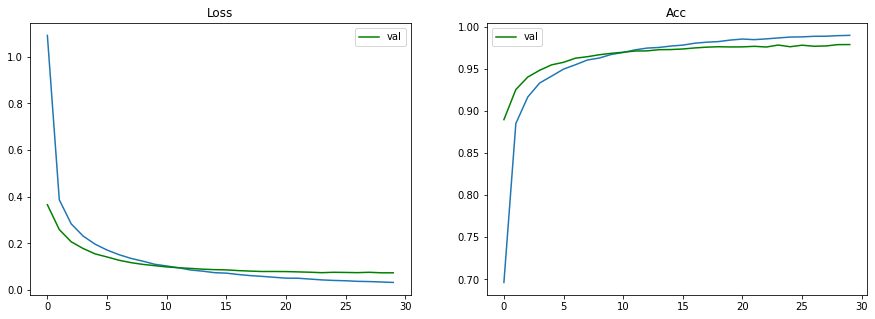

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(c_history.history['loss'])
plt.plot(c_history.history['val_loss'], color = 'g', label='val')
plt.legend()
plt.subplot(1,2,2)
plt.title('Acc')
plt.plot(c_history.history['accuracy'])
plt.plot(c_history.history['val_accuracy'], color = 'g', label='val')
plt.legend()
plt.show()

In [15]:
c_model.load_weights('weights/c_model_0025.ckpt')

loss, acc = c_model.evaluate(X_test, y_test, verbose=2)
print("정확도는 {:5.2f}%".format(acc*100))


313/313 - 0s - loss: 10.8978 - accuracy: 0.9805
정확도는 98.05%


- 모델 저장

In [16]:
c_model.save('saved_model/c_model1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/c_model1/assets


- 저장된 모델 불러와서 다시 학습

In [17]:
model2 = tf.keras.models.load_model('saved_model/c_model1')
model2.compile(optimizer = keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
model2.fit(X_train, y_train, epochs=5,batch_size=5000)

Epoch 1/5
12/12 [==============================] - 1s 101ms/step - loss: 0.0547 - accuracy: 0.9834
Epoch 2/5
12/12 [==============================] - 1s 102ms/step - loss: 0.0478 - accuracy: 0.9860
Epoch 3/5
12/12 [==============================] - 1s 103ms/step - loss: 0.0436 - accuracy: 0.9868
Epoch 4/5
12/12 [==============================] - 1s 103ms/step - loss: 0.0411 - accuracy: 0.9875
Epoch 5/5
12/12 [==============================] - 1s 104ms/step - loss: 0.0391 - accuracy: 0.9881


In [18]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 10.7404 - accuracy: 0.9799


[10.740361213684082, 0.9799000024795532]

In [19]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


<br><br><br>

# 텍스트 데이터 다루기


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "단어 처리 방법은 첫번째 원핫, 단어 단어 단어 처리" # 임의의 문장


In [21]:
token = Tokenizer()
token.fit_on_texts([text]) #단어 인덱스 구축
print( token.word_index )

{'단어': 1, '처리': 2, '방법은': 3, '첫번째': 4, '원핫': 5}


In [22]:
sub_text = "첫번째 처리 단어 두번째"
encoded = token.texts_to_sequences([sub_text]) #문자열을 정수 인덱스의 리스트로 변환
encoded

[[4, 2, 1]]

In [23]:
token = Tokenizer()
text = "The earth is an awesome place live"
token.fit_on_texts([text])
print(token.word_index)

{'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [24]:
# 단어 사전 개수 확인
len(token.word_index)

7

In [25]:
text1 = "The earth is an great place live"
text2 = "aaa earth an great placde live is"

encoded = token.texts_to_sequences([text1, text2])
encoded

[[1, 2, 3, 4, 6, 7], [2, 4, 7, 3]]

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(encoded, maxlen=6, padding="post") #길이를 가장 큰것에 맞추기 post 뒤쪽, pre 앞쪽
sequences

array([[1, 2, 3, 4, 6, 7],
       [2, 4, 7, 3, 0, 0]], dtype=int32)

In [27]:
a=tf.constant(sequences)
a

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 4, 6, 7],
       [2, 4, 7, 3, 0, 0]], dtype=int32)>

In [28]:
embedding_layer = keras.layers.Embedding(7 + 1, 3, input_length=6)(a)
embedding_layer

<tf.Tensor: shape=(2, 6, 3), dtype=float32, numpy=
array([[[-0.01506116,  0.00688448,  0.03589321],
        [-0.0226518 ,  0.01399871, -0.03055754],
        [-0.00919955,  0.04873741,  0.01094858],
        [ 0.01204866,  0.03017709, -0.0368422 ],
        [-0.01937528, -0.01845517, -0.00775238],
        [ 0.04564816,  0.00336234,  0.01717314]],

       [[-0.0226518 ,  0.01399871, -0.03055754],
        [ 0.01204866,  0.03017709, -0.0368422 ],
        [ 0.04564816,  0.00336234,  0.01717314],
        [-0.00919955,  0.04873741,  0.01094858],
        [-0.04142957, -0.02688451,  0.03077688],
        [-0.04142957, -0.02688451,  0.03077688]]], dtype=float32)>

In [29]:
average_pooling = keras.layers.GlobalAveragePooling1D()(embedding_layer)
average_pooling

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.00143183,  0.01411748, -0.0018562 ],
       [-0.00950228,  0.00708442,  0.00371263]], dtype=float32)>

In [30]:
#embedding_layer 원소의 열별 평균
embedding_layer.numpy().mean(axis=1) #GAP 결과와 같다

array([[-0.00143183,  0.01411748, -0.0018562 ],
       [-0.00950228,  0.00708442,  0.00371263]], dtype=float32)

<br><br><br>

# 영화리뷰분석

In [31]:
imdb = tf.keras.datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000) 

17465344/17464789 [==============================] - 0s 0us/step


In [32]:
X_train.shape

(25000,)

In [33]:
X_test.shape

(25000,)

In [34]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [35]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [36]:
word_index = imdb.get_word_index()
word_index

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
reversed_word_index = {v:k for k,v in word_index.items()}
reversed_word_index

In [38]:
def decode_review(text):
   return ' '.join([reverse_word_index.get(i,'?') for i in text]) #단어 사전에 없으면 '?'로 변환

In [40]:
X_train = pad_sequences(X_train, value=0, maxlen=256, padding="post")
X_test = pad_sequences(X_test, value=0, maxlen=256, padding="post")

In [41]:
vocab_size = 10000 

  # model = tf.keras.models.Sequential([      
  #   tf.keras.layers.Flatten(input_shape=(28, 28)),
  #   tf.keras.layers.Dense(512, activation="relu", input_shape=(784, )),
  #   tf.keras.layers.Dropout(0.2),
  #   tf.keras.layers.Dense(10)                           
  # ])

model = tf.keras.Sequential()
model.add( tf.keras.layers.Embedding(vocab_size, 16) )
model.add( tf.keras.layers.GlobalAveragePooling1D()  )
model.add( tf.keras.layers.Dense(16, activation="relu") )
model.add( tf.keras.layers.Dense(1, activation="sigmoid") )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.2)

Epoch 1/40
40/40 [==============================] - 1s 15ms/step - loss: 0.6911 - accuracy: 0.6499 - val_loss: 0.6872 - val_accuracy: 0.7286
Epoch 2/40
40/40 [==============================] - 0s 12ms/step - loss: 0.6810 - accuracy: 0.7567 - val_loss: 0.6713 - val_accuracy: 0.7608
Epoch 3/40
40/40 [==============================] - 1s 13ms/step - loss: 0.6579 - accuracy: 0.7598 - val_loss: 0.6405 - val_accuracy: 0.7812
Epoch 4/40
40/40 [==============================] - 0s 12ms/step - loss: 0.6188 - accuracy: 0.7925 - val_loss: 0.5954 - val_accuracy: 0.7798
Epoch 5/40
40/40 [==============================] - 1s 13ms/step - loss: 0.5664 - accuracy: 0.8144 - val_loss: 0.5416 - val_accuracy: 0.8074
Epoch 6/40
40/40 [==============================] - 1s 13ms/step - loss: 0.5090 - accuracy: 0.8342 - val_loss: 0.4889 - val_accuracy: 0.8260
Epoch 7/40
40/40 [==============================] - 1s 13ms/step - loss: 0.4538 - accuracy: 0.8536 - val_loss: 0.4429 - val_accuracy: 0.8462
Epoch 8/40
40

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

782/782 - 1s - loss: 0.3478 - accuracy: 0.8712


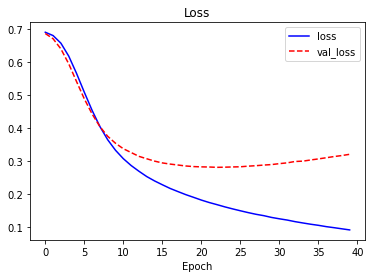

In [46]:
result = model.evaluate(X_test, y_test, verbose=2)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.title('Loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

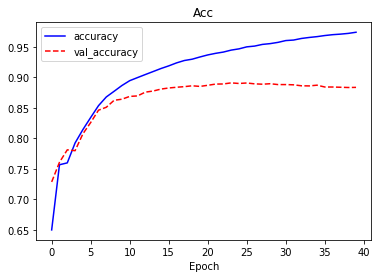

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.title('Acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy') 
plt.xlabel('Epoch')
plt.legend()
plt.show()
